In [32]:
#여러가지 형태소 분석기가 있다
from konlpy.tag import Hannanum #형태소 나눠주는 것
from konlpy.tag import Okt #각 형태소 별로 분류(Tagging 작업)

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import numpy as np
import pandas as pd
import io
import re

In [57]:
data = pd.read_csv('C:/Users/seon/data2.csv')
data.head()

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2022/03/08 13:54:33,84,경상북도 성주군,146496,"[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스...",cbs
1,2022/03/08 13:43:49,85,경상북도 안동시,146495,[안동시청] 관내 강한 바람으로 인해 대형 산불 발생 위험이 매우 높습니다. 산림 ...,cbs
2,2022/03/08 13:17:44,195,전라남도 완도군,146494,"[완도군청] 목욕탕, 사우나 등 다중이용시설 확진자 급속확산 중 ▶KF마스크 착용,...",cbs
3,2022/03/08 13:10:43,212,전라북도 임실군,146493,[임실군청] 3.8.(화) 13시 기준 확진자 135명 발생 / 개인 방역수칙 준수...,cbs
4,2022/03/08 13:08:00,214,전라북도 전주시,146492,"[전주시청]3.8(화) 현재기준 2,731명 발생(전일 2,577명) O방역수칙 준...",cbs


In [58]:
cbs = data[['msg']]
data.filter(['msg'])
cbs.head()

,msg
0,"[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스..."
1,[안동시청] 관내 강한 바람으로 인해 대형 산불 발생 위험이 매우 높습니다. 산림 ...
2,"[완도군청] 목욕탕, 사우나 등 다중이용시설 확진자 급속확산 중 ▶KF마스크 착용,..."
3,[임실군청] 3.8.(화) 13시 기준 확진자 135명 발생 / 개인 방역수칙 준수...
4,"[전주시청]3.8(화) 현재기준 2,731명 발생(전일 2,577명) O방역수칙 준..."


In [59]:
a = cbs.loc[0,'msg']
print(a)

[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스크착용 철저▲타지역방문 및 모임 자제▲유증상시 즉시 검사


In [60]:
def tokenizer(row):
    return tagger.nouns(row)

In [54]:
data['keyword'] = data['msg'].apply(tokenizer)
data.head(2)

,create_date,location_id,location_name,md101_sn,msg,send_platform,keyword
0,2022/03/08 13:54:33,84,경상북도 성주군,146496,"[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스...",cbs,"[성주군, 화, 코로나, 확, 진자, 명, 관내, 지역, 발생, 마스크, 착용, 철..."
1,2022/03/08 13:43:49,85,경상북도 안동시,146495,[안동시청] 관내 강한 바람으로 인해 대형 산불 발생 위험이 매우 높습니다. 산림 ...,cbs,"[안동시청, 관내, 바람, 대형, 산불, 발생, 위험, 매우, 산림, 인접, 소각,..."


In [65]:
if __name__=='__main__':
    tagger=Okt()
    noun_list = []
    for i in range(1,10):
        noun_list += tagger.nouns(cbs.loc[i,'msg'])
    print(noun_list) #리스트 형식으로 출력
    #keyword만 따로 열 만들어서 추가
    data['keyword'] = data['msg'].apply(tokenizer)

['안동시청', '관내', '바람', '대형', '산불', '발생', '위험', '매우', '산림', '인접', '소각', '금지', '재', '처리', '주의', '입산', '시', '흡연', '금지', '등', '산불', '예방', '협조', '완도군청', '목욕탕', '사우나', '등', '다중', '이용', '시설', '확', '진자', '급속', '확산', '중', '마스크', '착용', '외출', '자제', '이동', '동선', '최소', '증상', '시', '자가진단', '검사', '임실군', '청', '화', '기준', '확', '진자', '명', '발생', '개인', '방역', '칙', '준수', '지역', '방문', '자제', '유증', '시', '즉시', '검사', '전주', '시청', '화', '현재', '기준', '명', '발생', '전일', '명', '방역', '칙', '준수', '의심', '증상', '선', '진료', '소', '방문', '검사', '재택', '치료', '안내', '나주', '시청', '수', '대통령선거', '투표소', '방문', '시', '줄', '간격', '유지', '등', '방역', '칙', '준수', '확', '진자', '방문', '보건소', '발송', '문자', '시후', '투표', '전남도청', '최근', '전국', '산불', '건', '발생', '산', '흡연', '산림', '주변', '담뱃불', '투기', '절대', '금지', '논', '밭', '두렁', '영농', '부산물', '등', '소각', '금지', '화재', '시', '먼저', '신고', '속초', '시청', '월', '명', '확진', '속초', '시민', '지역', '개인', '방역', '철저', '증상', '의심', '시', '선', '진료', '소', '방문', '밀양', '시청', '현재', '우리', '시', '건조', '경보', '발효', '농업', '부산물', '금지', '입산', '시', '화', '기물', '소지', '맙시'

In [67]:
data.head(5)

,create_date,location_id,location_name,md101_sn,msg,send_platform,keyword
0,2022/03/08 13:54:33,84,경상북도 성주군,146496,"[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스...",cbs,"[성주군, 화, 코로나, 확, 진자, 명, 관내, 지역, 발생, 마스크, 착용, 철..."
1,2022/03/08 13:43:49,85,경상북도 안동시,146495,[안동시청] 관내 강한 바람으로 인해 대형 산불 발생 위험이 매우 높습니다. 산림 ...,cbs,"[안동시청, 관내, 바람, 대형, 산불, 발생, 위험, 매우, 산림, 인접, 소각,..."
2,2022/03/08 13:17:44,195,전라남도 완도군,146494,"[완도군청] 목욕탕, 사우나 등 다중이용시설 확진자 급속확산 중 ▶KF마스크 착용,...",cbs,"[완도군청, 목욕탕, 사우나, 등, 다중, 이용, 시설, 확, 진자, 급속, 확산,..."
3,2022/03/08 13:10:43,212,전라북도 임실군,146493,[임실군청] 3.8.(화) 13시 기준 확진자 135명 발생 / 개인 방역수칙 준수...,cbs,"[임실군, 청, 화, 기준, 확, 진자, 명, 발생, 개인, 방역, 칙, 준수, 지..."
4,2022/03/08 13:08:00,214,전라북도 전주시,146492,"[전주시청]3.8(화) 현재기준 2,731명 발생(전일 2,577명) O방역수칙 준...",cbs,"[전주, 시청, 화, 현재, 기준, 명, 발생, 전일, 명, 방역, 칙, 준수, 의..."


In [97]:
data = pd.read_csv('C:/Users/seon/data2.csv')
data.head()

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2022/03/08 13:54:33,84,경상북도 성주군,146496,"[성주군] ▲3.8.(화) 코로나19 확진자 67명(관내56,타지역11) 발생▲마스...",cbs
1,2022/03/08 13:43:49,85,경상북도 안동시,146495,[안동시청] 관내 강한 바람으로 인해 대형 산불 발생 위험이 매우 높습니다. 산림 ...,cbs
2,2022/03/08 13:17:44,195,전라남도 완도군,146494,"[완도군청] 목욕탕, 사우나 등 다중이용시설 확진자 급속확산 중 ▶KF마스크 착용,...",cbs
3,2022/03/08 13:10:43,212,전라북도 임실군,146493,[임실군청] 3.8.(화) 13시 기준 확진자 135명 발생 / 개인 방역수칙 준수...,cbs
4,2022/03/08 13:08:00,214,전라북도 전주시,146492,"[전주시청]3.8(화) 현재기준 2,731명 발생(전일 2,577명) O방역수칙 준...",cbs


In [100]:
cbs2 = data[['msg']]

def tokenizer(row):
    return tagger.nouns(row)

cbs2['keyword'] = cbs2['msg'].apply(tokenizer)
cbs.head(10)

C:\Users\seon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,msg,keyword
0,"[영동군청]확진 159명(확진자접촉 56, 증상발현 101, 무증상 2)발생▲유증상...","[성주군, 화, 코로나, 확, 진자, 명, 관내, 지역, 발생, 마스크, 착용, 철..."
1,[통영시청] 3.4.(금) 확진자559명(7277~7835번)발생▲타지방문·사적모임...,"[안동시청, 관내, 바람, 대형, 산불, 발생, 위험, 매우, 산림, 인접, 소각,..."
2,[보성군] 건조한 날씨로 인해 산불위기경보 “경계” 단계▲산불 발생 위험 높음▲산림...,"[완도군청, 목욕탕, 사우나, 등, 다중, 이용, 시설, 확, 진자, 급속, 확산,..."
3,[함평군청] 코로나19 확진자는 3.5.(토) 17시~18시 가까운 투표소에 신분증...,"[임실군, 청, 화, 기준, 확, 진자, 명, 발생, 개인, 방역, 칙, 준수, 지..."
4,[함평군청] 대통령선거 사전투표 3.4.(금)~3.5.(토) 06~18시 1m 줄간...,"[전주, 시청, 화, 현재, 기준, 명, 발생, 전일, 명, 방역, 칙, 준수, 의..."
5,"[거제시청] 확진자1,099명 ▲코로나19관련 재택치료 시 자세한 행동 요령 htt...","[나주, 시청, 수, 대통령선거, 투표소, 방문, 시, 줄, 간격, 유지, 등, 방..."
6,[나주시청] 코로나19 확진자는 3.5.(토)17시~18시 가까운 투표소에 신분증 ...,"[전남도청, 최근, 전국, 산불, 건, 발생, 산, 흡연, 산림, 주변, 담뱃불, ..."
7,[나주시청] 대통령선거 사전투표 3.4.(금) ~ 3.5.(토) 06~18시 1m줄...,"[속초, 시청, 월, 명, 확진, 속초, 시민, 지역, 개인, 방역, 철저, 증상,..."
8,[해남군청]3월4일 확진자 110명 발생▶3.4(금)~3.5(토) 문화예술회관 다목...,"[밀양, 시청, 현재, 우리, 시, 건조, 경보, 발효, 농업, 부산물, 금지, 입..."
9,[영양군청]현재 산불위기경보 경계 단계로 산불 발생 위험이 높으니 주민과 등산객은 ...,"[익산, 시청, 세, 이하, 소아, 청소년, 확, 진자, 계속, 증가, 외출, 자제..."


In [81]:
from nltk.probability import FreqDist
fdist = FreqDist(noun_list)
print(fdist)

<FreqDist with 546 samples and 1905 outcomes>


In [88]:
fdist.most_common(25)

[('명', 93),
 ('확', 77),
 ('진자', 76),
 ('발생', 66),
 ('금', 42),
 ('시청', 34),
 ('기준', 34),
 ('준수', 32),
 ('군청', 32),
 ('등', 31),
 ('방역', 31),
 ('칙', 31),
 ('지역', 29),
 ('코로나', 27),
 ('검사', 25),
 ('자제', 23),
 ('마스크', 21),
 ('시', 21),
 ('모임', 20),
 ('착용', 20),
 ('및', 17),
 ('방문', 16),
 ('개인', 15),
 ('산불', 15),
 ('관내', 15)]

In [83]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

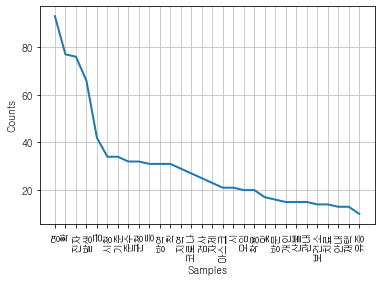

In [84]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()